# Install Modules

# Imports

In [138]:
# 1. Basic Python Imports
import pandas as pd
import numpy as np
import pickle as pi
import os
from pathlib import Path

# 2. API PULL
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
from defillama import DefiLlama

# 3. API Keys
from dotenv import load_dotenv

# 4. Panadas_Datareader
import pandas_datareader.data as web
from pandas_datareader import data, wb
import pandas_datareader as pdr

# 5. Date Time
import datetime as dt
from datetime import datetime

# 6. Plotting
import plotly
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import hvplot.pandas 
import hvplot.dask 


In [96]:
import coinmarketcapapi

cmc = coinmarketcapapi.CoinMarketCapAPI('3486d5cf-6e5b-443f-8f9a-140421f63bb3')

In [97]:
# Changing scientific notation of values in table 

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [98]:
# api pull
data_listing = cmc.cryptocurrency_listings_latest(convert='USD')

In [99]:
# create df and narrow columns
df = pd.DataFrame.from_dict(data_listing.data)

df = df[['name', 'symbol', 'date_added', 'quote']]
df

,name,symbol,date_added,quote
0,Bitcoin,BTC,2013-04-28T00:00:00.000Z,"{'USD': {'price': 34516.59345051623, 'volume_2..."
1,Ethereum,ETH,2015-08-07T00:00:00.000Z,"{'USD': {'price': 2561.773886738274, 'volume_2..."
2,Tether,USDT,2015-02-25T00:00:00.000Z,"{'USD': {'price': 0.9998512590560582, 'volume_..."
3,BNB,BNB,2017-07-25T00:00:00.000Z,"{'USD': {'price': 357.91512758721166, 'volume_..."
4,USD Coin,USDC,2018-10-08T00:00:00.000Z,"{'USD': {'price': 1.0005045401203392, 'volume_..."
...,...,...,...,...
95,Anchor Protocol,ANC,2021-03-17T00:00:00.000Z,"{'USD': {'price': 1.6221750352771038, 'volume_..."
96,Kadena,KDA,2020-05-31T00:00:00.000Z,"{'USD': {'price': 3.2019636514592746, 'volume_..."
97,1inch Network,1INCH,2020-12-25T00:00:00.000Z,"{'USD': {'price': 1.3196256034584022, 'volume_..."
98,Audius,AUDIO,2020-10-20T00:00:00.000Z,"{'USD': {'price': 0.7663438344815516, 'volume_..."


In [100]:
# isolate quotes column for expansion into columns
quotes_df = df[['name', 'quote']].copy()
df = df.drop(columns = ['quote'])

In [101]:
# expand into columns
usd = quotes_df["quote"].apply(pd.Series)
price = usd['USD'].apply(pd.Series)

In [102]:
# concat for final df
crypto_df = pd.concat([df, price], axis = 1, join = 'inner')

crypto_df.head(10)

,name,symbol,date_added,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,last_updated
0,Bitcoin,BTC,2013-04-28T00:00:00.000Z,34516.593,38493603558.651,87.507,1.344,-3.914,-9.188,-19.646,-17.861,-21.547,657002404758.352,41.441,724848462460.840,2022-05-08T18:59:00.000Z
1,Ethereum,ETH,2015-08-07T00:00:00.000Z,2561.774,22407332339.461,100.406,1.588,-4.699,-7.806,-21.338,-5.564,-18.751,309201803065.731,19.503,309201803065.730,2022-05-08T18:58:00.000Z
2,Tether,USDT,2015-02-25T00:00:00.000Z,1.000,84382634195.555,77.338,0.004,-0.003,-0.027,-0.051,-0.052,-0.080,83204999263.959,5.250,85701202641.110,2022-05-08T18:58:00.000Z
3,BNB,BNB,2017-07-25T00:00:00.000Z,357.915,2016447308.250,46.461,1.043,-5.156,-6.903,-16.454,-9.220,-17.859,58439299206.750,3.686,59097786222.190,2022-05-08T18:58:00.000Z
4,USD Coin,USDC,2018-10-08T00:00:00.000Z,1.001,5810493183.759,78.681,0.033,0.043,0.049,0.065,0.061,0.010,48715469856.717,3.073,48715469856.720,2022-05-08T18:58:00.000Z
5,XRP,XRP,2013-08-04T00:00:00.000Z,0.572,1672360050.227,53.438,0.922,-3.696,-5.021,-24.850,-24.909,-26.889,27649229379.542,1.744,57193743667.520,2022-05-08T18:59:00.000Z
6,Solana,SOL,2020-04-10T00:00:00.000Z,76.344,1571221084.057,58.247,1.909,-6.489,-13.450,-33.374,-12.348,-36.299,25589538519.016,1.614,39058916226.940,2022-05-08T18:58:00.000Z
7,Cardano,ADA,2017-10-01T00:00:00.000Z,0.752,1140471088.515,60.914,1.625,-3.292,-3.552,-28.901,-10.781,-36.413,25371309994.791,1.601,33839413877.390,2022-05-08T18:58:00.000Z
8,Terra,LUNA,2019-07-26T00:00:00.000Z,67.015,5897578986.396,192.291,2.096,-7.661,-17.101,-31.464,-32.832,16.369,22981075978.798,1.450,48629681572.360,2022-05-08T18:59:00.000Z
9,TerraUSD,UST,2020-09-21T00:00:00.000Z,0.997,2699172683.985,353.489,0.091,-0.232,-0.149,-0.297,-0.758,-0.174,18670412066.060,1.177,18670412066.060,2022-05-08T18:58:00.000Z


In [103]:
# Sorting values by largest market cap  

crypto_df.sort_values(by='market_cap', ascending=False).head(10)

,name,symbol,date_added,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,last_updated
0,Bitcoin,BTC,2013-04-28T00:00:00.000Z,34516.593,38493603558.651,87.507,1.344,-3.914,-9.188,-19.646,-17.861,-21.547,657002404758.352,41.441,724848462460.840,2022-05-08T18:59:00.000Z
1,Ethereum,ETH,2015-08-07T00:00:00.000Z,2561.774,22407332339.461,100.406,1.588,-4.699,-7.806,-21.338,-5.564,-18.751,309201803065.731,19.503,309201803065.730,2022-05-08T18:58:00.000Z
2,Tether,USDT,2015-02-25T00:00:00.000Z,1.000,84382634195.555,77.338,0.004,-0.003,-0.027,-0.051,-0.052,-0.080,83204999263.959,5.250,85701202641.110,2022-05-08T18:58:00.000Z
3,BNB,BNB,2017-07-25T00:00:00.000Z,357.915,2016447308.250,46.461,1.043,-5.156,-6.903,-16.454,-9.220,-17.859,58439299206.750,3.686,59097786222.190,2022-05-08T18:58:00.000Z
4,USD Coin,USDC,2018-10-08T00:00:00.000Z,1.001,5810493183.759,78.681,0.033,0.043,0.049,0.065,0.061,0.010,48715469856.717,3.073,48715469856.720,2022-05-08T18:58:00.000Z
5,XRP,XRP,2013-08-04T00:00:00.000Z,0.572,1672360050.227,53.438,0.922,-3.696,-5.021,-24.850,-24.909,-26.889,27649229379.542,1.744,57193743667.520,2022-05-08T18:59:00.000Z
6,Solana,SOL,2020-04-10T00:00:00.000Z,76.344,1571221084.057,58.247,1.909,-6.489,-13.450,-33.374,-12.348,-36.299,25589538519.016,1.614,39058916226.940,2022-05-08T18:58:00.000Z
7,Cardano,ADA,2017-10-01T00:00:00.000Z,0.752,1140471088.515,60.914,1.625,-3.292,-3.552,-28.901,-10.781,-36.413,25371309994.791,1.601,33839413877.390,2022-05-08T18:58:00.000Z
8,Terra,LUNA,2019-07-26T00:00:00.000Z,67.015,5897578986.396,192.291,2.096,-7.661,-17.101,-31.464,-32.832,16.369,22981075978.798,1.450,48629681572.360,2022-05-08T18:59:00.000Z
9,TerraUSD,UST,2020-09-21T00:00:00.000Z,0.997,2699172683.985,353.489,0.091,-0.232,-0.149,-0.297,-0.758,-0.174,18670412066.060,1.177,18670412066.060,2022-05-08T18:58:00.000Z


In [104]:
crypto_df['market_cap'].dtypes

dtype('float64')

In [105]:
crypto_df.loc['market_cap'] = crypto_df.loc[:, 'market_cap'].astype("float")

In [106]:
crypto_df.dtypes

name                         object
symbol                       object
date_added                   object
price                       float64
volume_24h                  float64
volume_change_24h           float64
percent_change_1h           float64
percent_change_24h          float64
percent_change_7d           float64
percent_change_30d          float64
percent_change_60d          float64
percent_change_90d          float64
market_cap                  float64
market_cap_dominance        float64
fully_diluted_market_cap    float64
last_updated                 object
dtype: object

In [107]:
# Eliminate the coins under $25B market cap 

crypto_df_sorted = crypto_df.loc[crypto_df['market_cap'] >= 25000000000].copy()
crypto_df_sorted.head(10)

,name,symbol,date_added,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,last_updated
0,Bitcoin,BTC,2013-04-28T00:00:00.000Z,34516.593,38493603558.651,87.507,1.344,-3.914,-9.188,-19.646,-17.861,-21.547,657002404758.352,41.441,724848462460.840,2022-05-08T18:59:00.000Z
1,Ethereum,ETH,2015-08-07T00:00:00.000Z,2561.774,22407332339.461,100.406,1.588,-4.699,-7.806,-21.338,-5.564,-18.751,309201803065.731,19.503,309201803065.730,2022-05-08T18:58:00.000Z
2,Tether,USDT,2015-02-25T00:00:00.000Z,1.000,84382634195.555,77.338,0.004,-0.003,-0.027,-0.051,-0.052,-0.080,83204999263.959,5.250,85701202641.110,2022-05-08T18:58:00.000Z
3,BNB,BNB,2017-07-25T00:00:00.000Z,357.915,2016447308.250,46.461,1.043,-5.156,-6.903,-16.454,-9.220,-17.859,58439299206.750,3.686,59097786222.190,2022-05-08T18:58:00.000Z
4,USD Coin,USDC,2018-10-08T00:00:00.000Z,1.001,5810493183.759,78.681,0.033,0.043,0.049,0.065,0.061,0.010,48715469856.717,3.073,48715469856.720,2022-05-08T18:58:00.000Z
5,XRP,XRP,2013-08-04T00:00:00.000Z,0.572,1672360050.227,53.438,0.922,-3.696,-5.021,-24.850,-24.909,-26.889,27649229379.542,1.744,57193743667.520,2022-05-08T18:59:00.000Z
6,Solana,SOL,2020-04-10T00:00:00.000Z,76.344,1571221084.057,58.247,1.909,-6.489,-13.450,-33.374,-12.348,-36.299,25589538519.016,1.614,39058916226.940,2022-05-08T18:58:00.000Z
7,Cardano,ADA,2017-10-01T00:00:00.000Z,0.752,1140471088.515,60.914,1.625,-3.292,-3.552,-28.901,-10.781,-36.413,25371309994.791,1.601,33839413877.390,2022-05-08T18:58:00.000Z


In [108]:
# Out of the remaining coins, eliminate coins that are newer than 2020 

crypto_df_sorted_2 = crypto_df_sorted.loc[crypto_df_sorted['date_added'] <= '2020-01-01'].copy()
crypto_df_sorted_2.head(10)

,name,symbol,date_added,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,last_updated
0,Bitcoin,BTC,2013-04-28T00:00:00.000Z,34516.593,38493603558.651,87.507,1.344,-3.914,-9.188,-19.646,-17.861,-21.547,657002404758.352,41.441,724848462460.840,2022-05-08T18:59:00.000Z
1,Ethereum,ETH,2015-08-07T00:00:00.000Z,2561.774,22407332339.461,100.406,1.588,-4.699,-7.806,-21.338,-5.564,-18.751,309201803065.731,19.503,309201803065.730,2022-05-08T18:58:00.000Z
2,Tether,USDT,2015-02-25T00:00:00.000Z,1.000,84382634195.555,77.338,0.004,-0.003,-0.027,-0.051,-0.052,-0.080,83204999263.959,5.250,85701202641.110,2022-05-08T18:58:00.000Z
3,BNB,BNB,2017-07-25T00:00:00.000Z,357.915,2016447308.250,46.461,1.043,-5.156,-6.903,-16.454,-9.220,-17.859,58439299206.750,3.686,59097786222.190,2022-05-08T18:58:00.000Z
4,USD Coin,USDC,2018-10-08T00:00:00.000Z,1.001,5810493183.759,78.681,0.033,0.043,0.049,0.065,0.061,0.010,48715469856.717,3.073,48715469856.720,2022-05-08T18:58:00.000Z
5,XRP,XRP,2013-08-04T00:00:00.000Z,0.572,1672360050.227,53.438,0.922,-3.696,-5.021,-24.850,-24.909,-26.889,27649229379.542,1.744,57193743667.520,2022-05-08T18:59:00.000Z
7,Cardano,ADA,2017-10-01T00:00:00.000Z,0.752,1140471088.515,60.914,1.625,-3.292,-3.552,-28.901,-10.781,-36.413,25371309994.791,1.601,33839413877.390,2022-05-08T18:58:00.000Z


In [109]:
# Eliminate Stablecoins - Struggling syntax to retain Terra Luna in this dataframe @Lucas

crypto_df_sorted_3 = crypto_df_sorted_2.loc[crypto_df_sorted_2['percent_change_90d'] < -1].copy()
crypto_df_sorted_3.head(10)

,name,symbol,date_added,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,last_updated
0,Bitcoin,BTC,2013-04-28T00:00:00.000Z,34516.593,38493603558.651,87.507,1.344,-3.914,-9.188,-19.646,-17.861,-21.547,657002404758.352,41.441,724848462460.840,2022-05-08T18:59:00.000Z
1,Ethereum,ETH,2015-08-07T00:00:00.000Z,2561.774,22407332339.461,100.406,1.588,-4.699,-7.806,-21.338,-5.564,-18.751,309201803065.731,19.503,309201803065.730,2022-05-08T18:58:00.000Z
3,BNB,BNB,2017-07-25T00:00:00.000Z,357.915,2016447308.250,46.461,1.043,-5.156,-6.903,-16.454,-9.220,-17.859,58439299206.750,3.686,59097786222.190,2022-05-08T18:58:00.000Z
5,XRP,XRP,2013-08-04T00:00:00.000Z,0.572,1672360050.227,53.438,0.922,-3.696,-5.021,-24.850,-24.909,-26.889,27649229379.542,1.744,57193743667.520,2022-05-08T18:59:00.000Z
7,Cardano,ADA,2017-10-01T00:00:00.000Z,0.752,1140471088.515,60.914,1.625,-3.292,-3.552,-28.901,-10.781,-36.413,25371309994.791,1.601,33839413877.390,2022-05-08T18:58:00.000Z


In [110]:
#Testing dropping 2 colums

crypto_df_sorted_4 = crypto_df_sorted_3.drop(['volume_24h', 'volume_change_24h'], axis=1)
crypto_df_sorted_4

,name,symbol,date_added,price,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,last_updated
0,Bitcoin,BTC,2013-04-28T00:00:00.000Z,34516.593,1.344,-3.914,-9.188,-19.646,-17.861,-21.547,657002404758.352,41.441,724848462460.840,2022-05-08T18:59:00.000Z
1,Ethereum,ETH,2015-08-07T00:00:00.000Z,2561.774,1.588,-4.699,-7.806,-21.338,-5.564,-18.751,309201803065.731,19.503,309201803065.730,2022-05-08T18:58:00.000Z
3,BNB,BNB,2017-07-25T00:00:00.000Z,357.915,1.043,-5.156,-6.903,-16.454,-9.220,-17.859,58439299206.750,3.686,59097786222.190,2022-05-08T18:58:00.000Z
5,XRP,XRP,2013-08-04T00:00:00.000Z,0.572,0.922,-3.696,-5.021,-24.850,-24.909,-26.889,27649229379.542,1.744,57193743667.520,2022-05-08T18:59:00.000Z
7,Cardano,ADA,2017-10-01T00:00:00.000Z,0.752,1.625,-3.292,-3.552,-28.901,-10.781,-36.413,25371309994.791,1.601,33839413877.390,2022-05-08T18:58:00.000Z


# Next we are finding our DeFi set of coins

In [111]:
# initialize api client|
llama = DefiLlama()

# Get all protocols data
response = llama.get_all_protocols()

# Get a protocol data
response_1 = llama.get_protocol(name='uniswap')

# Get historical values of total TVL
response_2 = llama.get_historical_tvl()

# Get protocol TVL
response_3 = llama.get_protocol_tvl(name='uniswap')

In [112]:
# Created a DataFrame to structure by relevant parameters

defi_df = pd.DataFrame(response, 
                    columns =[
                        'name',
                        'symbol',
                        'tvl',
                        'fdv',
                        'mcap'
                    ])

defi_df.set_index('name',inplace=True)
defi_df.head()

,symbol,tvl,fdv,mcap
name,,,,
Curve,CRV,17152229415.256,7984542032.000,947495371.000
Lido,LDO,16192700639.323,2506280845.000,845043702.000
Anchor,ANC,13558238419.718,1581263670.000,543745681.000
MakerDAO,MKR,11993415156.190,1191223940.000,1067708567.000
AAVE,AAVE,10731146980.423,2038724410.000,1747296104.000


In [113]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [114]:
defi_df1 = pd.DataFrame.from_dict(response)

defi_df1 = defi_df1[['name','symbol', 'tvl', 'fdv', 'mcap']]
defi_df1.set_index('symbol', inplace=True)
defi_df1


,name,tvl,fdv,mcap
symbol,,,,
CRV,Curve,17152229415.256,7984542032.000,947495371.000
LDO,Lido,16192700639.323,2506280845.000,845043702.000
ANC,Anchor,13558238419.718,1581263670.000,543745681.000
MKR,MakerDAO,11993415156.190,1191223940.000,1067708567.000
AAVE,AAVE,10731146980.423,2038724410.000,1747296104.000
...,...,...,...,...
VAL,Valerian,0.000,NaN,NaN
CLY,Celerycash,0.000,797234.000,0.000
JOY,Joystick Club,0.000,699048.000,0.000


In [115]:
# Sort by highest TVL's 

defi_df.sort_values(by='tvl', ascending=False).head()

,symbol,tvl,fdv,mcap
name,,,,
Curve,CRV,17152229415.256,7984542032.000,947495371.000
Lido,LDO,16192700639.323,2506280845.000,845043702.000
Anchor,ANC,13558238419.718,1581263670.000,543745681.000
MakerDAO,MKR,11993415156.190,1191223940.000,1067708567.000
AAVE,AAVE,10731146980.423,2038724410.000,1747296104.000


In [116]:
defi_df.dtypes

symbol     object
tvl       float64
fdv       float64
mcap      float64
dtype: object

In [117]:
defi_df1= defi_df.loc[defi_df['tvl'] > 9000000000].copy()
defi_df1.sort_values(by='mcap', ascending=False).head(10)

,symbol,tvl,fdv,mcap
name,,,,
WBTC,WBTC,9678039079.140,9665717532.000,9665717532.000
Polygon Bridge & Staking,MATIC,9046324697.607,9713387569.000,6675904589.000
AAVE,AAVE,10731146980.423,2038724410.000,1747296104.000
Convex Finance,CVX,10601589302.780,2179364706.000,1322792592.000
MakerDAO,MKR,11993415156.190,1191223940.000,1067708567.000
Curve,CRV,17152229415.256,7984542032.000,947495371.000
Lido,LDO,16192700639.323,2506280845.000,845043702.000
Anchor,ANC,13558238419.718,1581263670.000,543745681.000


In [118]:
defi_df2 = defi_df1.loc[defi_df1['mcap'] < 10000000000].copy()
defi_df2.sort_values(by='tvl', ascending=False).head(10)

,symbol,tvl,fdv,mcap
name,,,,
Curve,CRV,17152229415.256,7984542032.000,947495371.000
Lido,LDO,16192700639.323,2506280845.000,845043702.000
Anchor,ANC,13558238419.718,1581263670.000,543745681.000
MakerDAO,MKR,11993415156.190,1191223940.000,1067708567.000
AAVE,AAVE,10731146980.423,2038724410.000,1747296104.000
Convex Finance,CVX,10601589302.780,2179364706.000,1322792592.000
WBTC,WBTC,9678039079.140,9665717532.000,9665717532.000
Polygon Bridge & Staking,MATIC,9046324697.607,9713387569.000,6675904589.000


In [119]:
defi_df2['mcap_tvl_ratio'] = defi_df2['mcap'] / defi_df2['tvl'] 
defi_df2.sort_values(by='mcap_tvl_ratio', ).head(10)

,symbol,tvl,fdv,mcap,mcap_tvl_ratio
name,,,,,
Anchor,ANC,13558238419.718,1581263670.000,543745681.000,0.040
Lido,LDO,16192700639.323,2506280845.000,845043702.000,0.052
Curve,CRV,17152229415.256,7984542032.000,947495371.000,0.055
MakerDAO,MKR,11993415156.190,1191223940.000,1067708567.000,0.089
Convex Finance,CVX,10601589302.780,2179364706.000,1322792592.000,0.125
AAVE,AAVE,10731146980.423,2038724410.000,1747296104.000,0.163
Polygon Bridge & Staking,MATIC,9046324697.607,9713387569.000,6675904589.000,0.738
WBTC,WBTC,9678039079.140,9665717532.000,9665717532.000,0.999


In [120]:
defi_df3 = defi_df2.loc[defi_df2['mcap_tvl_ratio'] < 0.5].copy()
defi_df3.sort_values(by='tvl', ascending=False).head(10)

,symbol,tvl,fdv,mcap,mcap_tvl_ratio
name,,,,,
Curve,CRV,17152229415.256,7984542032.000,947495371.000,0.055
Lido,LDO,16192700639.323,2506280845.000,845043702.000,0.052
Anchor,ANC,13558238419.718,1581263670.000,543745681.000,0.040
MakerDAO,MKR,11993415156.190,1191223940.000,1067708567.000,0.089
AAVE,AAVE,10731146980.423,2038724410.000,1747296104.000,0.163
Convex Finance,CVX,10601589302.780,2179364706.000,1322792592.000,0.125


In [121]:
defi_df3['fdv_tvl_ratio'] = defi_df3['fdv'] / defi_df3['tvl']
defi_df3

,symbol,tvl,fdv,mcap,mcap_tvl_ratio,fdv_tvl_ratio
name,,,,,,
Curve,CRV,17152229415.256,7984542032.000,947495371.000,0.055,0.466
Lido,LDO,16192700639.323,2506280845.000,845043702.000,0.052,0.155
Anchor,ANC,13558238419.718,1581263670.000,543745681.000,0.040,0.117
MakerDAO,MKR,11993415156.190,1191223940.000,1067708567.000,0.089,0.099
AAVE,AAVE,10731146980.423,2038724410.000,1747296104.000,0.163,0.190
Convex Finance,CVX,10601589302.780,2179364706.000,1322792592.000,0.125,0.206


In [122]:
# Market Cap / Total Value Locked RATIO :

# From a theoretical standpoint, the higher the TVL ratio is, the lower the value of an asset needs to be; however, this is not always the case when 
# we look at reality. One of the easiest ways to implement the TVL ratio is to help determine if a DeFi asset is undervalued or overvalued, and this can be done by looking at the ratio.
# If it is under 1/closer to 0, it is undervalued in most cases. 


In [123]:
# Fully Dilluted Value / Total Value Locked RATIO: 

# Similar to MCAP/TVL , FDV/TVL helps us tell the whole story and is also measured the same. The closer the ratio is to zero, typically the coin is viewed as undervalued. 
#If it is over 1, it may be overvalued. Using both metrics helps provide us with the full picture.  

In [124]:
# Understanding Fully Diluted Valuation (FDV)

#The Fully Diluted Valuation of a cryptocurrency or token is what the digital asset's market cap would be if all the coins or tokens in its total supply were issued. It’s calculated by
#multiplying the current market price of a particular coin or token with the maximum number of coins there will be.

# Now we need to import historical prices for the coins and find price relationship and correlation (variance, cov etc) 

### FUNKY FUNCTIONS

In [139]:
def cn_close_price_dfer(digital_asset=list):
    
    # Date information 
    startdate = datetime(2018,1,1)
    enddate = datetime.today() 
    
    # API PULL to get Data for coins
    adj_close = web.DataReader(digital_asset, 'yahoo',startdate, enddate)
    adj_close_df = adj_close.filter(like="Adj Close")
    adj_close_df.columns = adj_close_df.columns.droplevel(-2)
    
    return(adj_close_df)

In [140]:
def indx_close_price_xls(xlsfile_path=str):
    
    startdate = datetime(2018,1,1)
    
    
    dfs = pd.DataFrame()
    dfs= pd.read_excel(xlsfile_path, skiprows=6).dropna()
    dfs= dfs.rename({'Effective date ':'Date', 'S&P Cryptocurrency Broad Digital Market Index (USD)':'SPCBDM-USD'}, axis='columns')
    dfs= dfs.set_index('Date')
    dfs=dfs.dropna()
  
    return(dfs)

In [141]:
# 1. Our set of coins
string = "-USD"
coin_list = ['BTC','ETH','ADA','BNB','XRP','LUNA']
coin_list = [s + string for s in coin_list]

coin_list2 = ['CRV','LDO','ANC','CVX','MKR']
coin_list2 = [s + string for s in coin_list2]

### Getting The Data 

We chose 2018 to get complete data for all coins.

In [144]:
# Get DataFrame of Coinset A
adj_close_df = cn_close_price_dfer(coin_list)

# Get DataFrame of Index/Indices
SPCBDM_path = Path("./Resources/PerformanceGraphExport.xls")
spcbdm_indx = indx_close_price_xls(SPCBDM_path)

spcbdm_indx = spcbdm_indx['2018-01-01':'2022-05-06']
# Concatenate the coin and index dataframes into one df
concat_adj_close_df = pd.concat([adj_close_df, spcbdm_indx], axis=1)

concat_adj_close_df= concat_adj_close_df.dropna()
display(concat_adj_close_df.head())
display(concat_adj_close_df.tail())

,BTC-USD,ETH-USD,ADA-USD,BNB-USD,XRP-USD,LUNA-USD,SPCBDM-USD
Date,,,,,,,
2018-01-01,13657.200,772.641,0.729,8.415,2.391,0.074,1653.400
2018-01-02,14982.100,884.444,0.783,8.838,2.481,0.117,1855.820
2018-01-03,15201.000,962.720,1.080,9.536,3.105,0.102,1935.200
2018-01-04,15599.200,980.922,1.114,9.214,3.197,0.128,1931.220
2018-01-05,17429.500,997.720,1.000,14.917,3.049,0.163,2040.070


,BTC-USD,ETH-USD,ADA-USD,BNB-USD,XRP-USD,LUNA-USD,SPCBDM-USD
Date,,,,,,,
2022-05-02,38529.328,2857.410,0.782,389.671,0.614,0.004,3403.130
2022-05-03,37750.453,2783.476,0.771,383.476,0.605,0.004,3336.510
2022-05-04,39698.371,2940.645,0.897,402.503,0.646,0.004,3558.930
2022-05-05,36575.141,2749.213,0.791,378.774,0.599,0.004,3254.460
2022-05-06,36040.922,2694.980,0.783,379.304,0.603,0.004,3229.670


In [151]:
# Get DataFrame of Coinset B
adj_close_df2 = cn_close_price_dfer(coin_list2)

# Concatenate the coin and index dataframes into one df
concat_adj_close_df2 = pd.concat([adj_close_df2, spcbdm_indx], axis=1)

concat_adj_close_df2= concat_adj_close_df2.dropna()
display(concat_adj_close_df2.head())
display(concat_adj_close_df2.tail())

,CRV-USD,LDO-USD,ANC-USD,CVX-USD,MKR-USD,SPCBDM-USD
Date,,,,,,
2021-05-18,3.488,4.056,0.064,9.079,4657.817,4508.390
2021-05-19,1.975,2.436,0.039,6.164,3510.677,3743.390
2021-05-20,2.208,3.161,0.033,7.308,3956.245,3876.760
2021-05-21,1.851,2.217,0.030,5.780,3116.383,3354.100
2021-05-24,1.622,2.368,0.058,6.411,4176.241,3672.130


,CRV-USD,LDO-USD,ANC-USD,CVX-USD,MKR-USD,SPCBDM-USD
Date,,,,,,
2022-05-02,2.105,2.770,0.023,22.429,1482.810,3403.130
2022-05-03,2.156,2.747,0.023,22.459,1402.082,3336.510
2022-05-04,2.604,3.084,0.024,25.331,1496.008,3558.930
2022-05-05,2.457,2.820,0.022,23.457,1378.030,3254.460
2022-05-06,2.301,2.789,0.022,23.018,1338.703,3229.670


### Gearing up for Analysis 

In [145]:
# Variables
yearly_trading_days = 365 # For Crypto

# Data Frames Needed
#    1. Daily Returns
#    2. Average Annual Returns
#    3. Standard Deviation of Daily Returns
#    4. Sharpe Ratios
#    5. Correlation 


# Daily Returns
# Log of percentage change
df_daily_returns = concat_adj_close_df.pct_change()
df_daily_returns = df_daily_returns.dropna()

# Avg Annual Returns
avg_annual_return = df_daily_returns.mean() * yearly_trading_days
avg_annual_return.sort_values()



# Daily Returns STDDEV
df_daily_returns_stddev = df_daily_returns.std() * np.sqrt(yearly_trading_days)
df_daily_returns_stddev.sort_values()



#Sharpe Ratios
sharpe_ratios = avg_annual_return/df_daily_returns_stddev
sharpe_ratios.sort_values()


# Sharpe Graphs
sharpe_ratios.sort_values().hvplot.bar(
    hover_color='pink',
    title="Coin Portfolio & SPCBDM Sharpe Ratios"
).opts(
    width=700,
    yformatter='%.0f',
    #color="yellow",
    bgcolor="yellow",
    fontsize={
        'title': 15, 
        'labels': 12, 
    'xticks': 10, 
    'yticks': 10,},
    padding=0.1
)

:Bars   [index]   (0)

## Brief Note on Correlation

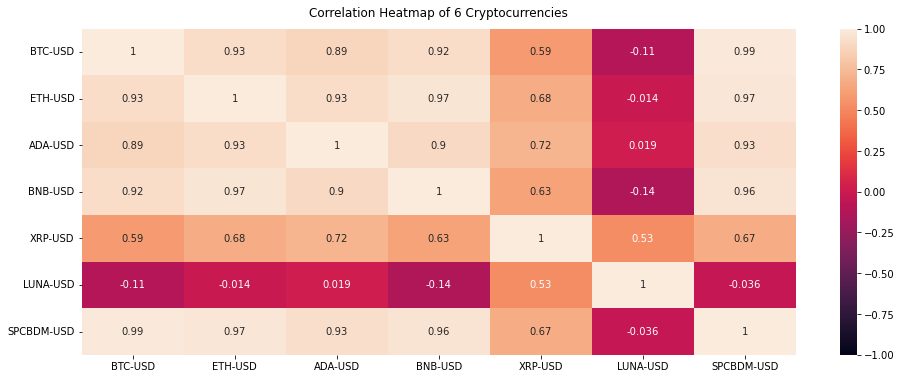

In [146]:
corr_df = concat_adj_close_df.corr(method='pearson')

#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()

#del corr_df.index.name
corr_df.head(10)

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap of 6 Cryptocurrencies', fontdict={'fontsize':12}, pad=12);